<a href="https://colab.research.google.com/github/ParthSharma1197/Capstone-Project-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **First Things First**

We will mount the drive and import libraries those are required throughout the course of our analysis.

In [1]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the modules that will be required over the course of flow throughout this project
import numpy as np
import pandas as pd
import math
import datetime as dt


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import display_html 


import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [3]:
#importing the dataset in our colab envirnoment
working_dir_path ="/content/drive/MyDrive/Colab Notebooks/CAPSTONE -Online Retail Customer Segmentation/Online Retail.xlsx"
df=pd.read_excel(working_dir_path)

#  **Initial Data review**

In [4]:
# Let's have a look first five rows of our dataset to have a lookover
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains {} Transactions.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 541909 Transactions.
Number of features are: 8. 


In [7]:
## Let's just inspect the dataset for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Let's check the null values for all the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Getting the list of all the features
print("Features of the dataset are:")
df.columns

Features of the dataset are:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
#Having a look the number of countries we have data for

#Storing the countries as a set for future use
countries=set(df['Country'].unique())
print(countries)

num_of_countries=df.Country.nunique()
print('Number of countries are:{}'.format(num_of_countries))

{'Canada', 'Brazil', 'Lithuania', 'United Kingdom', 'Germany', 'Czech Republic', 'Australia', 'Channel Islands', 'Iceland', 'Spain', 'Austria', 'Saudi Arabia', 'United Arab Emirates', 'Singapore', 'Cyprus', 'Poland', 'RSA', 'Italy', 'Finland', 'Belgium', 'Sweden', 'Malta', 'Japan', 'France', 'EIRE', 'Israel', 'European Community', 'Netherlands', 'USA', 'Switzerland', 'Hong Kong', 'Norway', 'Portugal', 'Unspecified', 'Denmark', 'Lebanon', 'Bahrain', 'Greece'}
Number of countries are:38


In [11]:
#Getting the statistical Summary of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can see the minimum value in the Quantity is negative.Therefore, we must look for these negative values.

In [12]:
# Number of records with negative quantity
neg_quantity=df.Quantity[df.Quantity < 0 ].count()
print("There are total {} record where the quantity is negative.".format(neg_quantity))

There are total 10624 record where the quantity is negative.


In [13]:
# Quick inspection of top records with Negative Quantity
df.loc[df.Quantity < 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21720,C538115,22178,VICTORIAN GLASS HANGING T-LIGHT,-1,2010-12-09 15:30:00,1.25,16817.0,United Kingdom
280750,561494,18097A,NaN,-23,2011-07-27 14:04:00,0.00,NaN,United Kingdom
320574,C565025,82494L,WOODEN FRAME ANTIQUE WHITE,-2,2011-08-31 16:32:00,2.95,13050.0,United Kingdom
383317,C570012,22166,WALL MIRROR RECTANGLE DIAMANTE PINK,-2,2011-10-07 09:53:00,7.95,15344.0,United Kingdom
164828,C550709,22212,FOUR HOOK WHITE LOVEBIRDS,-1,2011-04-20 10:53:00,2.10,12997.0,United Kingdom
476242,C576968,84949,SILVER HANGING T-LIGHT HOLDER,-2,2011-11-17 11:51:00,1.65,13668.0,United Kingdom
6783,C536979,22630,DOLLY GIRL LUNCH BOX,-1,2010-12-03 14:23:00,1.95,17841.0,United Kingdom
527316,C580703,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2011-12-05 16:26:00,3.75,16705.0,United Kingdom
229510,C557062,84950,ASSORTED COLOUR T-LIGHT HOLDER,-2,2011-06-16 14:56:00,0.65,13213.0,United Kingdom
344928,567127,85230E,Damaged,-48,2011-09-16 14:01:00,0.00,NaN,United Kingdom


In [14]:
#Let's have a look at the most expensive item in the store.
df[df.UnitPrice == df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


### **From the above review on dataset we have some observations:**


1. Most Invoices appear as normal transcations with positive quantity and prices, but there are some  values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.
2. Empty or Null values are in CustomerID are around 135080 that need to be treated.
3. Here we have a data for 38 different countries.
4. There are total 10624 record where the quantity is negative.
5. Average Unit price of all the items in the store is coming out to be 4.6 sterling.
6. Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.
7. We should further break-down the InvoiceDate column to draw some more insights.


## **Data Pre-processing**

### **1.Treating the Missing Values/Null-Values**

In [15]:
## Checking for missing values
null_val=df.isna().sum()
print('Missing Data Count :')
print(null_val)

Missing Data Count :
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Text(0.5, 1.0, 'Percentage of missing values per columns')

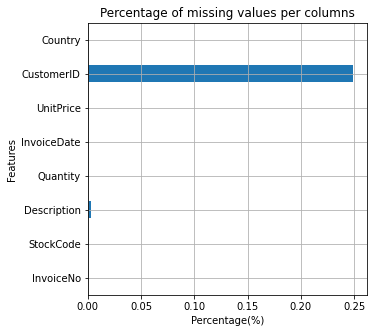

In [16]:
#Plot to show the percentage of missing values n the data set
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

Maximum number of missing values are coming from customer_id and we will drop such values.

## Dropping the Null Values

In [17]:
#Dropping the null values in the dataset
df.dropna(subset=['CustomerID'],inplace=True)

Text(0.5, 1.0, 'Percentage of missing values per columns')

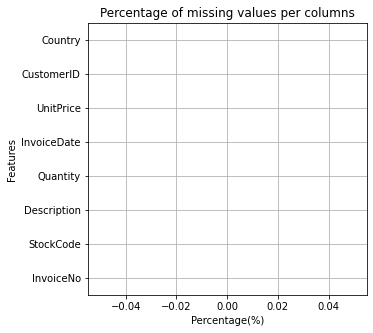

In [18]:
#Let's see the applied changes through the plot:
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")


In [19]:
# Check for the shape of the dataset after droppinng the null values:
print("Shape of the data set after dropping the null values is:\n{}".format(df.shape))

Shape of the data set after dropping the null values is:
(406829, 8)


#### **Hence,we have sucessfully treated the null values dataset**

### **2. Checking for the Duplicate values:**

In [20]:
# Checking for duplicates in our dataset
# duplicate=df.duplicated().any()
if df.duplicated().any():
    print("Duplicate Rows in our dataset are: {}".format(df.duplicated().sum()))
else:
    print("There are no duplicate records present in our dataset")

Duplicate Rows in our dataset are: 5225


If two records are same,the StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country but invoice number cannot be same therefore we must drop the duplicate records.

## Drop the Duplicate values from the dataset

In [21]:
#Drop the duplicated values
df.drop_duplicates(inplace=True)
print("Shape of the data set after dropping the duplicates is :\n{}".format(df.shape))

Shape of the data set after dropping the duplicates is :
(401604, 8)


# **EDA and Visualzation**



In [22]:
#Let's have a look at number of unique values in each feature 
features=df.columns
features

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [23]:
#Let's have a look at the unique values in each column
for feature in features:
    print(feature,':')
    print(df[feature].nunique())
    print("-----------------")

InvoiceNo :
22190
-----------------
StockCode :
3684
-----------------
Description :
3896
-----------------
Quantity :
436
-----------------
InvoiceDate :
20460
-----------------
UnitPrice :
620
-----------------
CustomerID :
4372
-----------------
Country :
37
-----------------


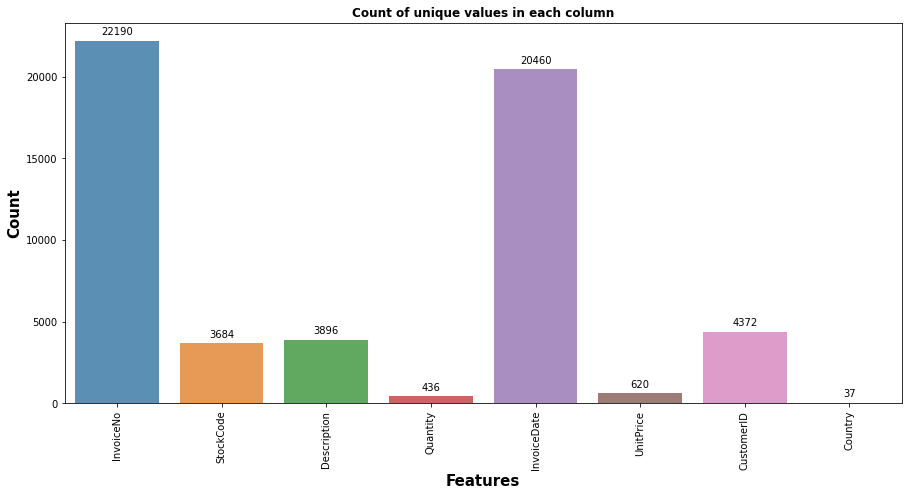

In [24]:
#Let's understand the unique values through visualization

#Let's create a dataframe for the number of unique values 
df_nunique=pd.DataFrame()
df_nunique['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
df_nunique['Uniques']=unique

# Plot the bar plot for the above results
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=df_nunique['Features'], y=df_nunique['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Count of unique values in each column',weight='bold')
plt.ylabel('Count', size=15, weight='bold')
plt.xlabel('Features', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

1. Although our dataset has initially 541909 records but the number of unique invoices generated are very less.
2. The number of unique countries available with us are 37 but before we did data preprocessing it was 38.We must look for the country that has vanished from the data.

In [25]:
#Getting the unique number of countries after the data preprocessing
countries_final=set(df.Country.unique())

#Let's just find the country that got vanished from the dataset
country_leftout=countries-countries_final
country_leftout

{'Hong Kong'}

Therefore,HonKong that got vanished away in the data preprocessing stage.

### **Top 10 Countries w.r.t The Number Of Invoices Generated**

In [26]:
#Let's create a dataframe 
country_df = df.groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
country_df

,Country,InvoiceNo
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


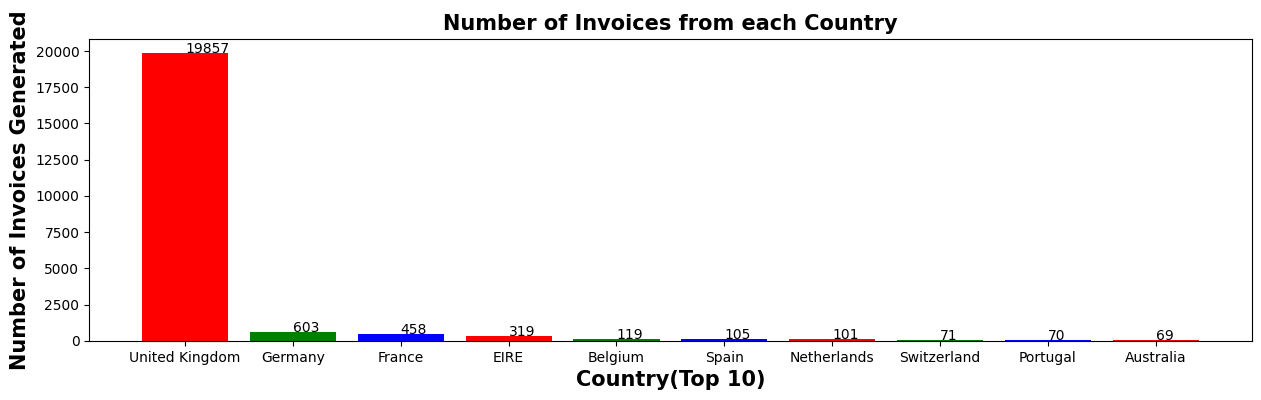

In [27]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,4),dpi=100)
plt.style.use('seaborn-colorblind')


# Define x and y 
x=country_df['Country']
y=country_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number of Invoices Generated",weight="bold",size=15)
plt.title("Number of Invoices from each Country",weight="bold",size=15)

## Showing the plot
plt.show()

### **Top 10 Countries w.r.t The Number Of Orders Sucessfully Generated** 





In [28]:
## Generating the dataframe of country w.r.t the Sucessfull orders generated
sales_df = df[~df['InvoiceNo'].str.startswith('C',na=False)].groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
sales_df

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


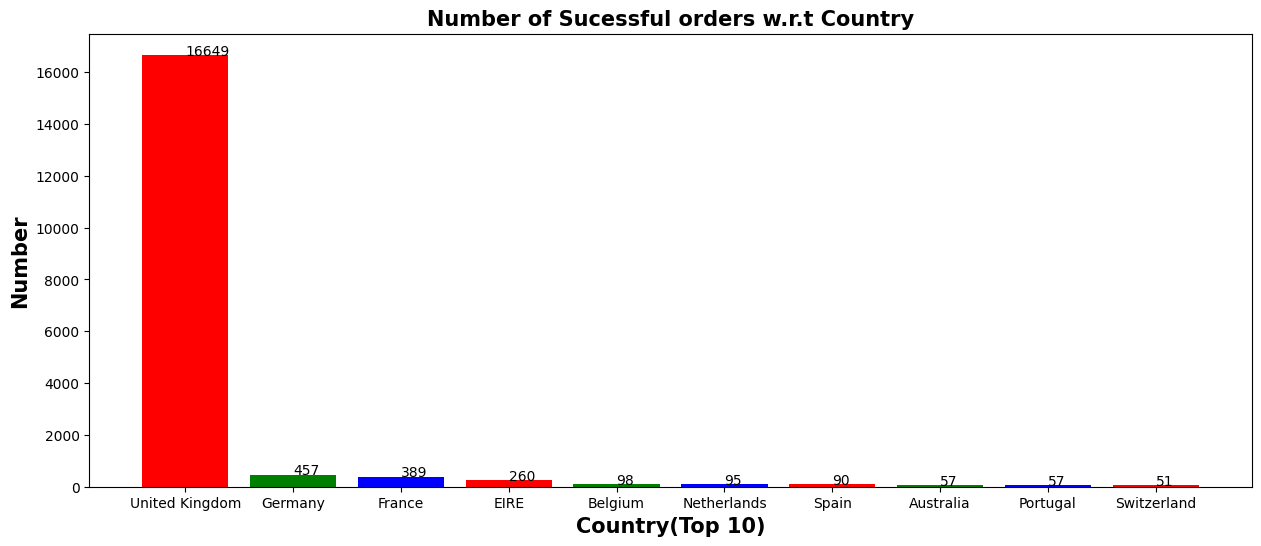

In [29]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,6),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=sales_df['Country']
y=sales_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number", weight="bold",size=15)
plt.title("Number of Sucessful orders w.r.t Country", weight="bold",size=15)

## Showing the plot
plt.show()

## **Cancelled Items**

From the description,If this code starts with letter 'C', it indicates a cancellation.

In [30]:
# Transactions with Cancelled Items.
cancelled = df[df.InvoiceNo.str.contains('C',na=False)]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [31]:
#Creating the dataframe for cancelled orders
cancelled_orders=cancelled[['InvoiceNo','Country']].groupby('Country').count().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()

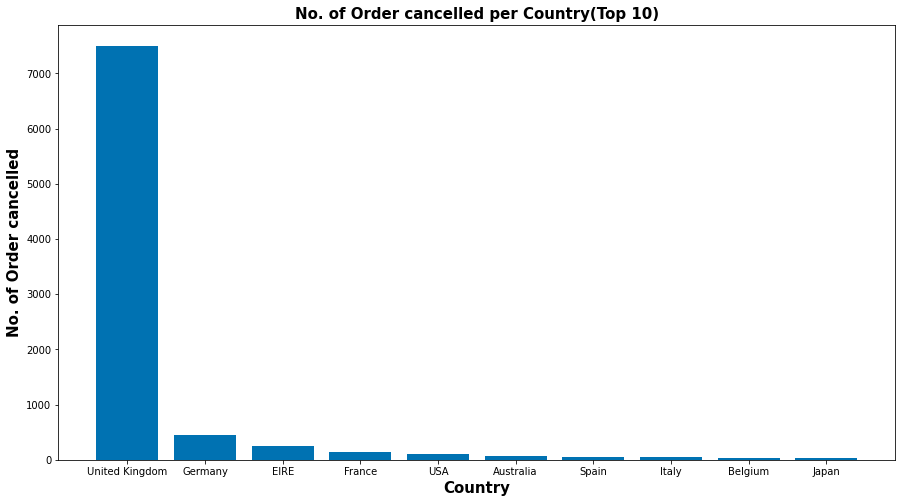

In [32]:
# Learning through visualization
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancelled_orders['Country']
y=cancelled_orders['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=15, weight='bold')
plt.ylabel("No. of Order cancelled", size=15, weight='bold')
plt.title("No. of Order cancelled per Country(Top 10)",size=15, weight='bold')

## Showing the plot
plt.show()



1. United Kingdom has got the maximum number cancelled orders followed by Germany with considerable margin.
2. Australia,Spain,Italy,Belgium,Japan has least and almost negligible amount of cancelled orders.   

In [33]:
#Taking only invoices which were not cancelled
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.shape

(392692, 8)

Majority of the transactions are from United Kingdom,other countries are costitute very small proportions in order to make our segmentation clean we will be going ahead with the United Kingdom data only.

In [34]:
# Filtering the dataset 
uk_data = df.loc[df['Country'] == 'United Kingdom']
